In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc, classification_report)

# Problem 1: Logistic Regression with ROC Analysis

In [25]:
# load Iris dataset
iris = datasets.load_iris()
# print(iris)
X = iris.data
y = (iris.target == 0).astype(int)  # 0 for Setosa, 1 for others (Non-Setosa)

In [26]:
# split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# train logistic regression
model = LogisticRegression() # initialization
model.fit(X_train, y_train) # model fit
y_pred = model.predict(X_test) # make prediction
y_prob = model.predict_proba(X_test)[:, 1] # get probability score

# calculate confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print("Confusion Matrix: ", "\n", conf_matrix)
print("\nPerformance Metrics:")
print("Accuracy: ", accuracy)
print(f"Precision: ", precision)
print(f"Recall: ", recall)
print(f"F1-score: ", f1)

Confusion Matrix:  
 [[29  0]
 [ 0 16]]

Performance Metrics:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0


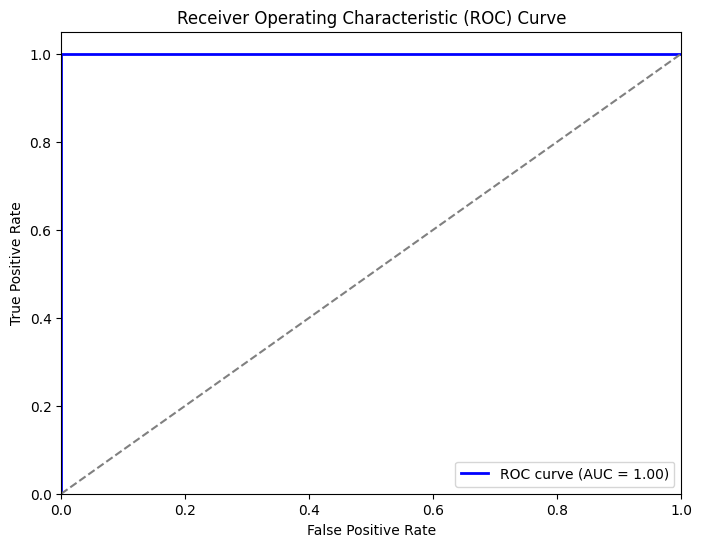

In [28]:
# compute roc and auc
fpr, tpr, _= roc_curve(y_test, y_prob) # compute false positive rate and true positive rate
roc_auc = auc(fpr, tpr) # calculate auc score

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Interpretation: The ROC curve shows that this is a perfect classifier. Tpr = 1 suggests that the classifier correctly classifies all the positive cases, and AUC = 1 means that it seperates positive and negative classes perfectly. The model correctly classifies all the data points. This can indicate that the dataset is really easy to classify, the datapoints are naturally linear separable.

# Problem 2: SVM with Kernel Selection

In [29]:
# load wine dataset
wine = datasets.load_wine()
# set x and y variables
X = wine.data
y = wine.target

# split dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# write a list to loop through each kernel
kernels = ['linear', 'rbf', 'poly']
svm_models = {}

In [30]:
# train three svm models with different kernels
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True, random_state=100) # initialize svm model
    svm.fit(X_train, y_train) # model fit
    y_pred = svm.predict(X_test) # get prediction

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # print performance metrics
    print(f"\nSVM with {kernel} kernel:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

    svm_models[kernel] = svm


SVM with linear kernel:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


SVM with rbf kernel:
Accuracy: 0.71
Precision: 0.70
Recall: 0.71
F1-score: 0.70
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.72      0.67        18
           2       0.44      0.33      0.38        12

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.70      0.71      0.70        45


SVM with poly kernel:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1-sco

## Interpretation: SVM with linear kernel achieved the best accuracy, with all the metrics achieving scores of 0.98. This means that the dataset is relatively easy to classify and the datapoints have some inherent linearity. For the other two kernels, polynomial kernel slightly performed better than RBF kernel, with 0.76 vs. 0.71 accuracy. Overall, class 0 is the simplest one to classify and class 2 is the hardest category to classify. This indicates that class 2 may have some undistinguished features than other two categories.